 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [53]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [54]:
# Reading whale returns
whale_returns_csv = Path("../Pandas/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [55]:
# Reading algorithmic returns
algo_returns_csv = Path("../Pandas/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# algo_returns.describe()
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()
algo_returns.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [56]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("../Pandas/Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# sp500_history.describe()
sp500_history.sort_index(ascending = True, inplace = True)
# sp500_history.head(10)
sp500_history.tail(10)

,Close
Date,
2019-04-09,$2878.20
2019-04-10,$2888.21
2019-04-11,$2888.32
2019-04-12,$2907.41
2019-04-15,$2905.58
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03
2019-04-22,$2907.97


In [11]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [57]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history.tail()

,Close
Date,
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03
2019-04-22,2907.97
2019-04-23,2933.68


In [13]:
sp500_history.dtypes

Close    float64
dtype: object

In [58]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history.pct_change()

In [59]:
# Drop nulls
daily_returns_sp500.dropna(inplace = True)
daily_returns_sp500.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [60]:
# Rename `Close` Column to be specific to this portfolio.
daily_returns_sp500.rename(columns={'Close':'SP 500'}, inplace=True)
daily_returns_sp500.head()

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [61]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, daily_returns_sp500], axis="columns", join="inner")
combined_df.dropna(inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

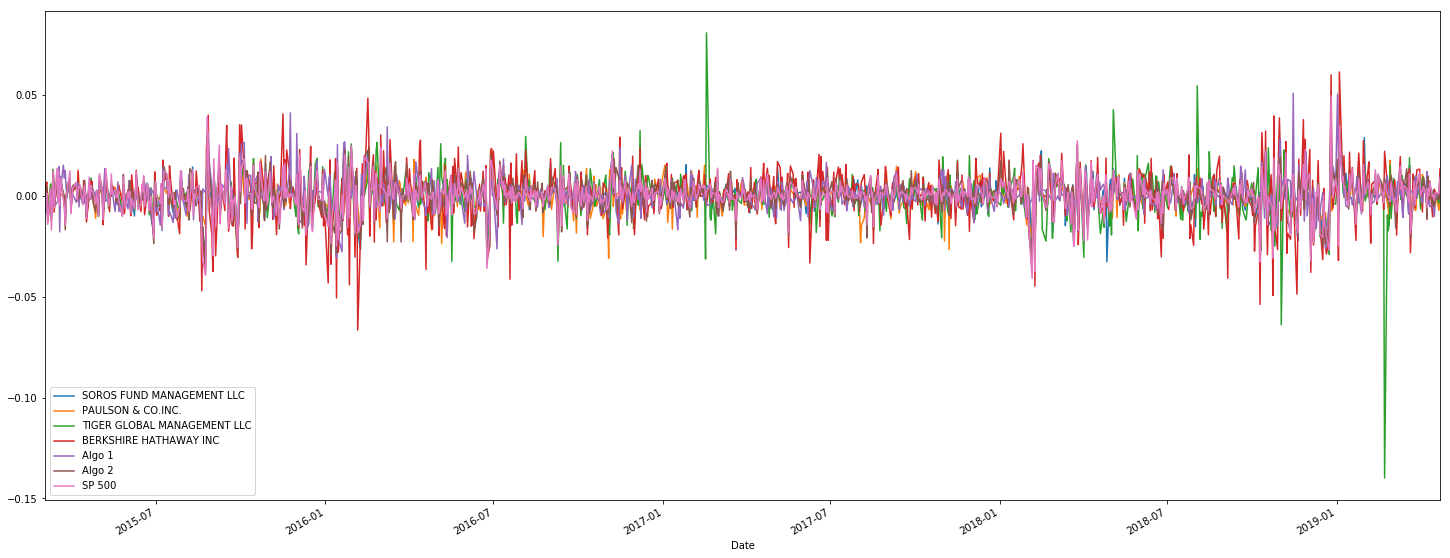

In [62]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (25,10))

#### Calculate and Plot cumulative returns.

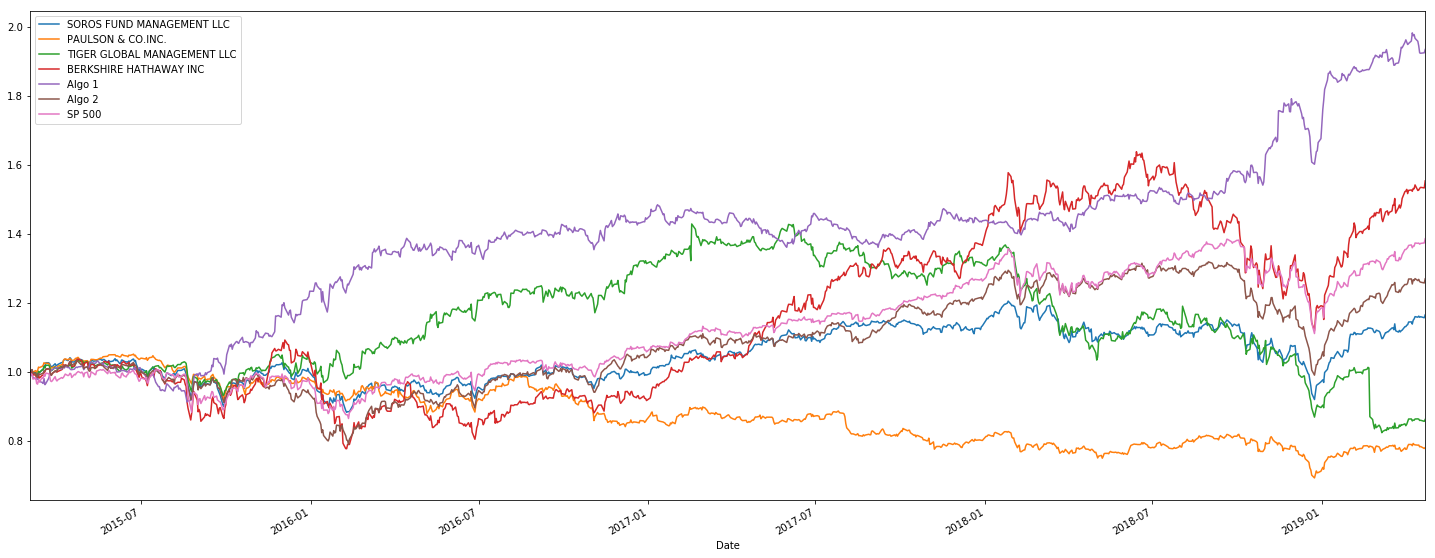

In [63]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize = (25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


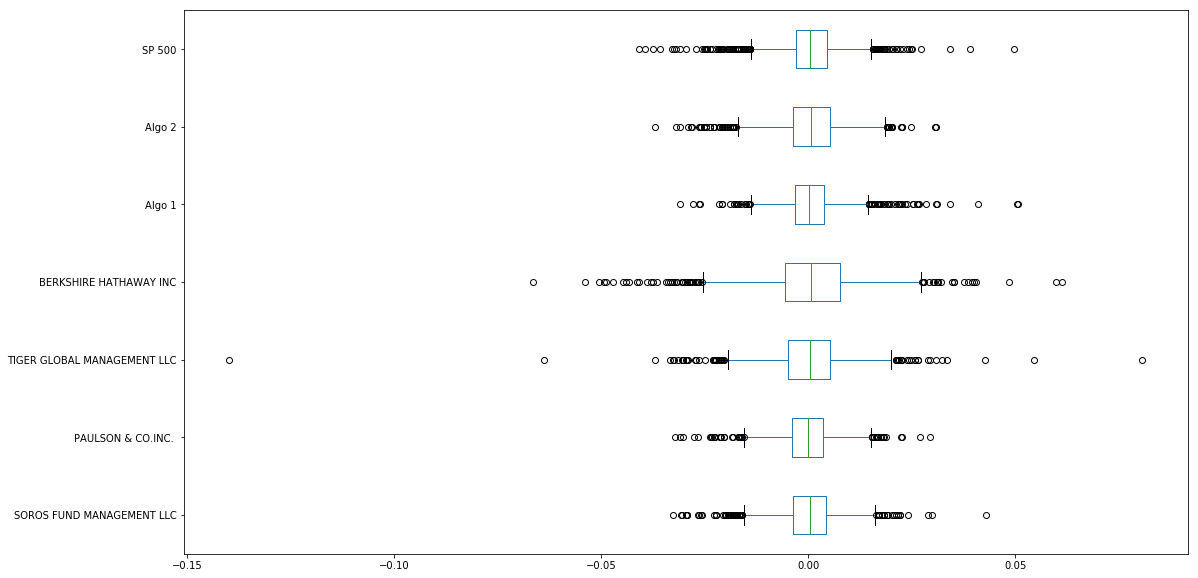

In [64]:
# Box plot to visually show risk
# combined_df.plot(kind = "box", figsize = (18,10))
combined_df.plot(kind="box", figsize = (18,10), vert=False)

### Calculate Standard Deviations

In [65]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
combined_df_std

,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
SP 500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [66]:
# Calculate  the daily standard deviation of S&P 500
print("The daily standard deviation of S&P 500 are:")
print (daily_returns_sp500.std())
# Determine which portfolios are riskier than the S&P 500
higher_std = combined_df_std[combined_df_std["std"] > combined_df_std.loc["SP 500", "std"]]
higher_std

The daily standard deviation of S&P 500 are:
SP 500    0.008111
dtype: float64


,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC have higher volitility than SP500.

### Calculate the Annualized Standard Deviation

In [67]:
# Calculate the annualized standard deviation (252 trading days)
df_annual_std = combined_df_std*np.sqrt(252)
df_annual_std

,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
SP 500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

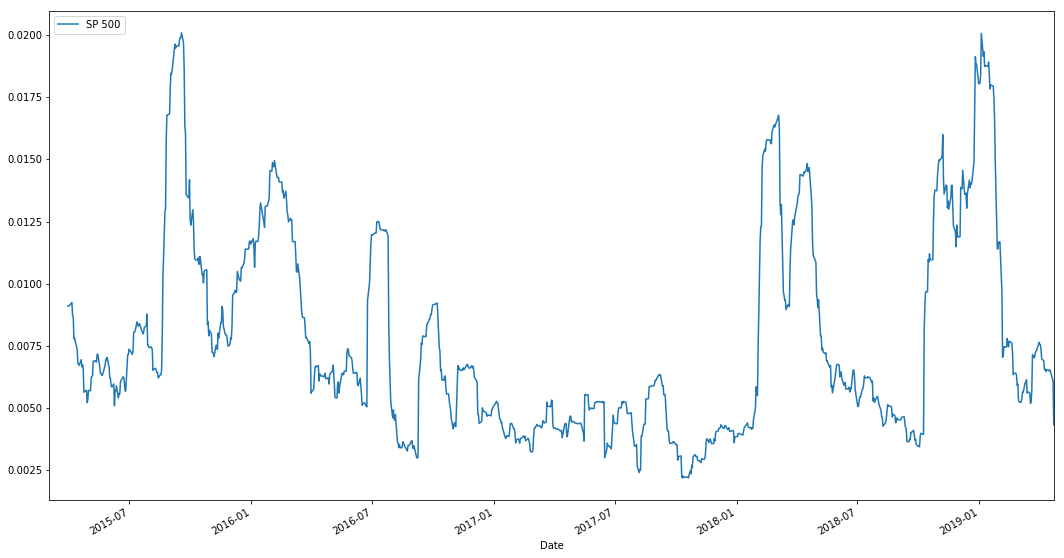

In [68]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21 = combined_df[["SP 500"]].rolling(window = 21).std()
# Plot the rolling standard deviation
sp500_rolling_21.plot(figsize = (18,10))

### Calculate and plot the correlation

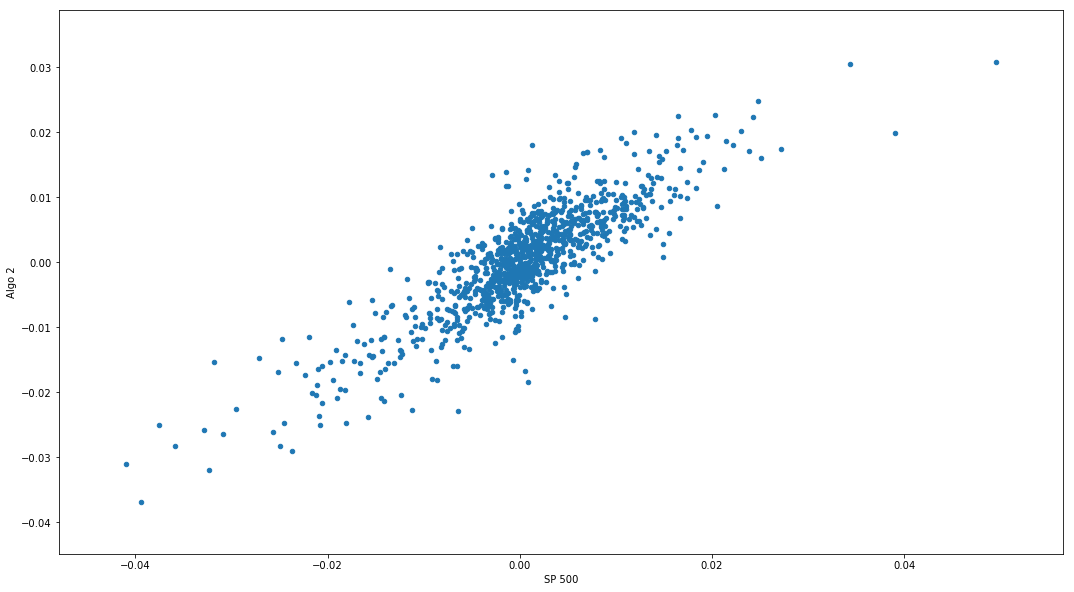

In [69]:
# Calculate the correlation
correlation_sp500 = pd.DataFrame(combined_df.corr()).loc[:,"SP 500"]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]
# Display de correlation matrix
combined_df.plot(kind="scatter", y = "Algo 2", x = "SP 500", figsize = (18,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

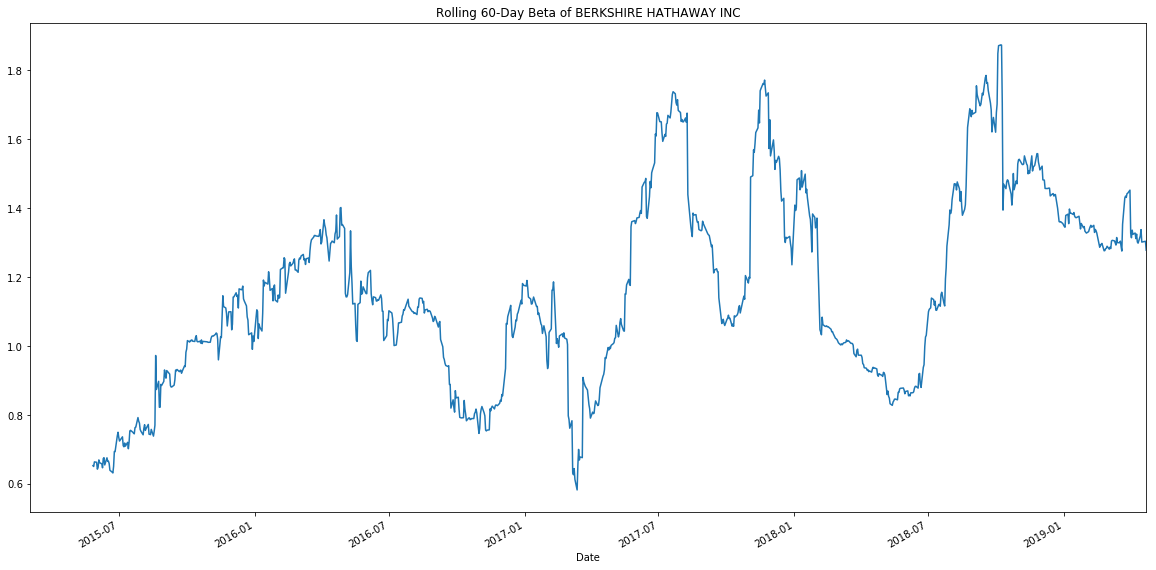

In [26]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP 500'])
# Calculate variance of S&P 500
rolling_variance = combined_df['SP 500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

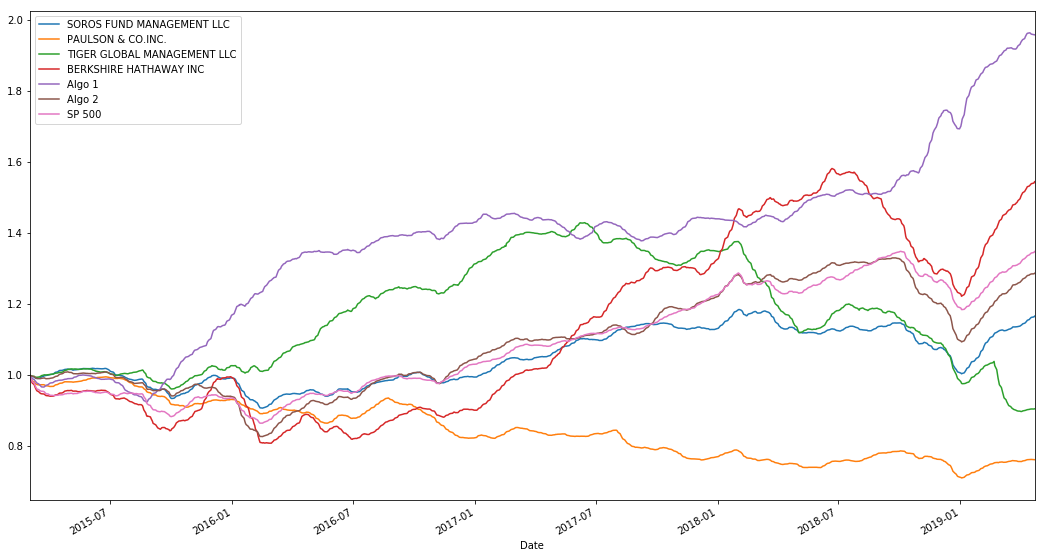

In [27]:
# Use `ewm` to calculate the rolling window
combined_df_ewm = combined_df.ewm(span = 21,adjust = False).mean()
(1+combined_df_ewm).cumprod().plot(figsize = (18,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP 500                         0.648267
dtype: float64

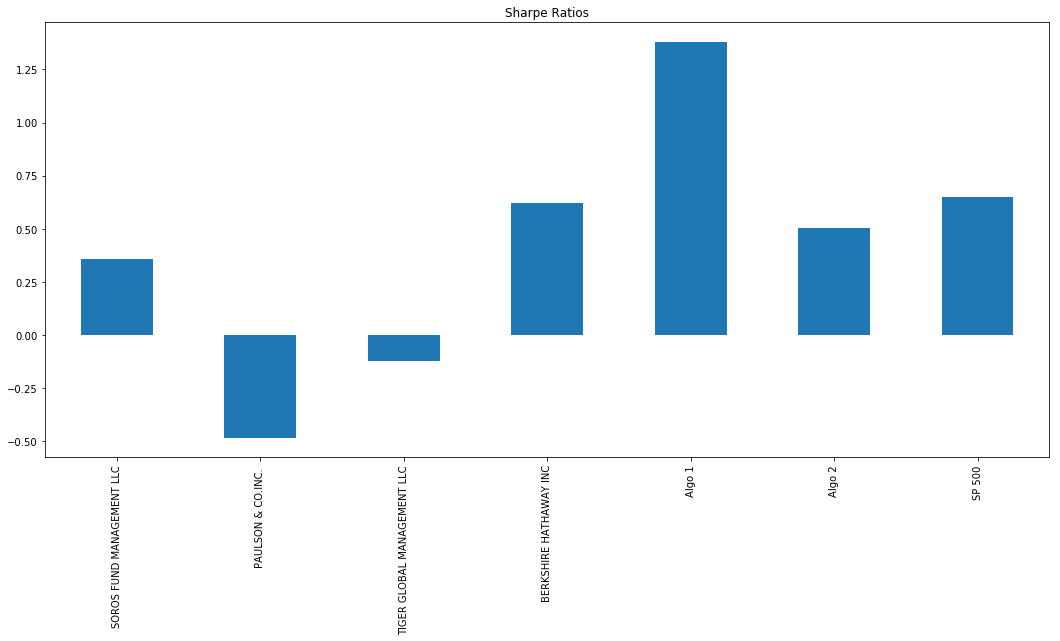

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios",figsize = (18,8))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

On the basis of Sharpe Ratios, Algo 1 outperformed the market. Algo 2, however, underperformed the market as a whole, as well as Berkshire Hathaway. Both Algo 1 and Algo 2 outperformed Soros Fund Managment, Paulson & Co. and Tiger Global Management.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [70]:
# Reading data from 1st stock
aapl_history = pd.read_csv(Path("Resources/aapl_historical.csv"), index_col="Trade DATE", 
                           parse_dates = True, infer_datetime_format= True)
aapl_history.rename(columns = {"Close":"aapl"}, inplace = True)
aapl_history.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [71]:
# Reading data from 2nd stock
cost_history = pd.read_csv(Path("Resources/cost_historical.csv"), index_col="Trade DATE", 
                           parse_dates = True, infer_datetime_format= True)
cost_history.rename(columns = {"Close":"cost"}, inplace = True)
cost_history.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [72]:
# Reading data from 3rd stock
goog_history = pd.read_csv(Path("Resources/goog_historical.csv"), index_col="Trade DATE", 
                           parse_dates = True, infer_datetime_format= True)
goog_history.rename(columns = {"Close":"goog"}, inplace = True)
goog_history.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [74]:
# Combine all stocks in a single DataFrame
total_stocks = pd.concat((aapl_history, cost_history, goog_history), axis = "rows", join= "inner")
total_stocks.sort_index(ascending = True, inplace = True)
total_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-11,AAPL,188.59
2018-05-11,COST,195.76
2018-05-14,AAPL,188.15
2018-05-14,COST,195.88


In [75]:
# Reset Date index
total_stocks = total_stocks.reset_index()
# Drop Nulls
total_stocks.dropna(inplace=True)
total_stocks.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-11,AAPL,188.59
2,2018-05-11,COST,195.76
3,2018-05-14,AAPL,188.15
4,2018-05-14,COST,195.88


In [76]:
# Reorganize portfolio data by having a column per symbol
total_stocks_pivot = total_stocks.pivot(values = 'NOCP', columns = 'Symbol', index = 'Trade DATE')
total_stocks_pivot.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
total_stocks_pivot.dropna()
total_stocks_pivot.isnull().sum()

Symbol
AAPL    0
COST    0
GOOG    0
dtype: int64

In [77]:
#Daily returns
daily_total_stocks = total_stocks_pivot.pct_change()
daily_total_stocks.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940


In [78]:
daily_total_stocks.dropna(inplace=True)
# Display sample data
daily_total_stocks.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [81]:
total_stocks_pivot['AAPL']=total_stocks_pivot["AAPL"].pct_change()
total_stocks_pivot['COST']=total_stocks_pivot["COST"].pct_change()
total_stocks_pivot['GOOG']=total_stocks_pivot["GOOG"].pct_change()
total_stocks_pivot.dropna(inplace=True)
total_stocks_pivot.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-16,-1.700021,1.099033,-0.904711
2018-05-17,-0.172330,-0.919822,1.001843
2018-05-18,-0.746698,1.353968,-2.270438
2018-05-21,5.938149,0.185718,-1.732643
2018-05-22,-0.540897,-0.026037,-0.170725


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [82]:
# Set weights
weights = [1/3, 1/3, 1/3]
total_stocks_pivot_returns = daily_total_stocks.dot(weights)
total_stocks_pivot_returns.dropna().head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [83]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_returns = pd.concat((total_stocks_pivot_returns, combined_df), axis = "columns", join = "inner")
portfolio_returns.rename(columns = {0:"My Portfolio"}, inplace = True)
portfolio_returns.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


In [84]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [85]:
# Calculate the annualized `std`
portfolio_annual_std = portfolio_returns*np.sqrt(252)
portfolio_annual_std.head()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP 500
2018-05-14,0.000245,0.000000,0.000000,0.000000,0.000000,0.014523,0.025952,0.014025
2018-05-15,-0.159754,-0.011523,-0.022364,-0.050632,-0.231862,-0.018014,-0.018078,-0.108616
2018-05-16,0.149272,0.137112,0.099126,0.086985,0.068418,-0.036931,0.053034,0.064459
2018-05-17,-0.025317,-0.031042,0.040065,-0.099488,-0.081591,-0.110316,0.082625,-0.013586
2018-05-18,-0.096209,-0.069171,-0.042424,-0.203700,-0.035113,0.040597,-0.039629,-0.041785


### Calculate and plot rolling `std` with 21-day window

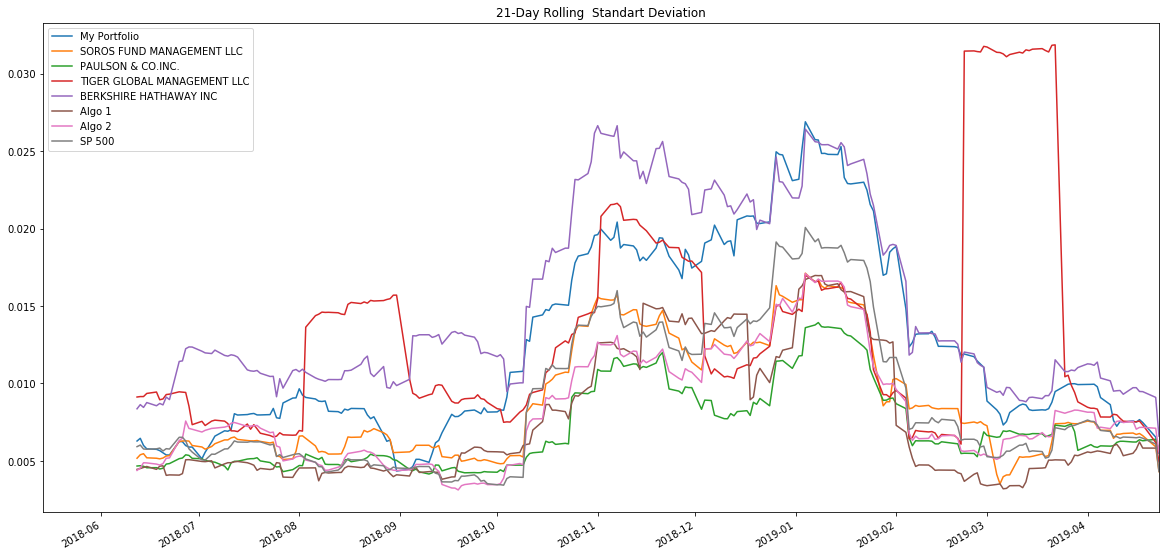

In [45]:
portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title='21-Day Rolling  Standart Deviation')

### Calculate and plot the correlation

In [86]:
# Calculate and plot the correlation
correlation_my_portfolio = portfolio_returns.corr().loc[:,"My Portfolio"]
correlation_my_portfolio[
    correlation_my_portfolio==correlation_my_portfolio[correlation_my_portfolio<1].max()]
# correlation_my_portfolio.plot(kind="scatter", y = "Algo 2", x = "My Portfolio", figsize = (18,10))
correlation_my_portfolio

My Portfolio                   1.000000
SOROS FUND MANAGEMENT LLC      0.733250
PAULSON & CO.INC.              0.644210
TIGER GLOBAL MANAGEMENT LLC    0.391972
BERKSHIRE HATHAWAY INC         0.801158
Algo 1                         0.261471
Algo 2                         0.739936
SP 500                         0.871875
Name: My Portfolio, dtype: float64

My portfolio is highly correlated to Algo 2.

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

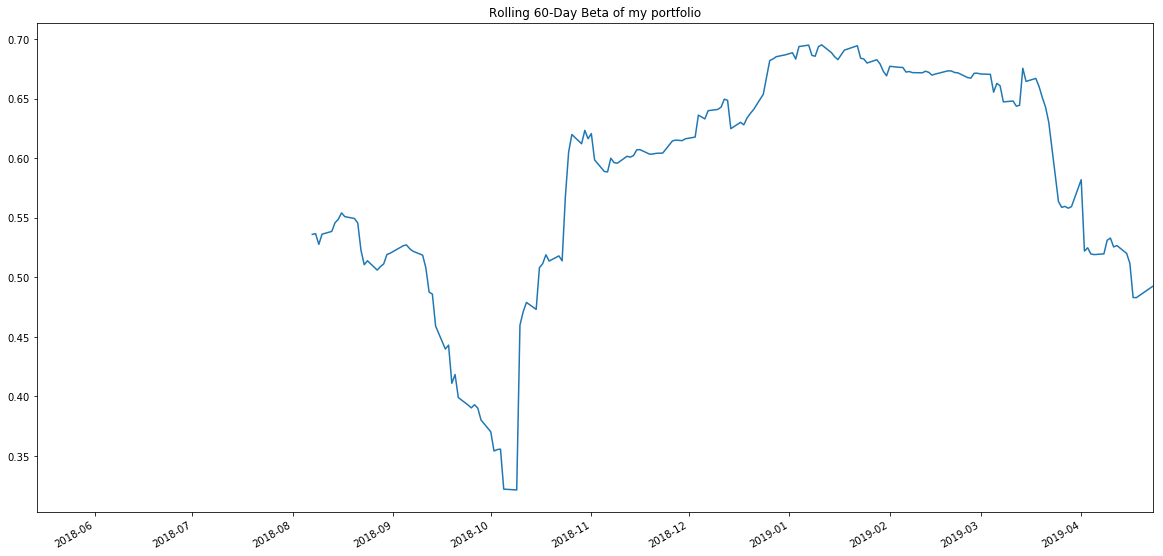

In [87]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns['My Portfolio'].rolling(window=60).cov(portfolio_returns['SP 500'])
rolling_variance = portfolio_returns['My Portfolio'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of my portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [88]:
# Calculate Annualzied Sharpe Ratios
trading_days = portfolio_returns.count()
sharpe_ratios = portfolio_returns.mean()*trading_days/(portfolio_returns.std()*np.sqrt(trading_days))
sharpe_ratios

My Portfolio                   0.904925
SOROS FUND MANAGEMENT LLC      0.417698
PAULSON & CO.INC.              0.250919
TIGER GLOBAL MANAGEMENT LLC   -1.002964
BERKSHIRE HATHAWAY INC         0.154928
Algo 1                         1.974150
Algo 2                         0.078171
SP 500                         0.567148
dtype: float64

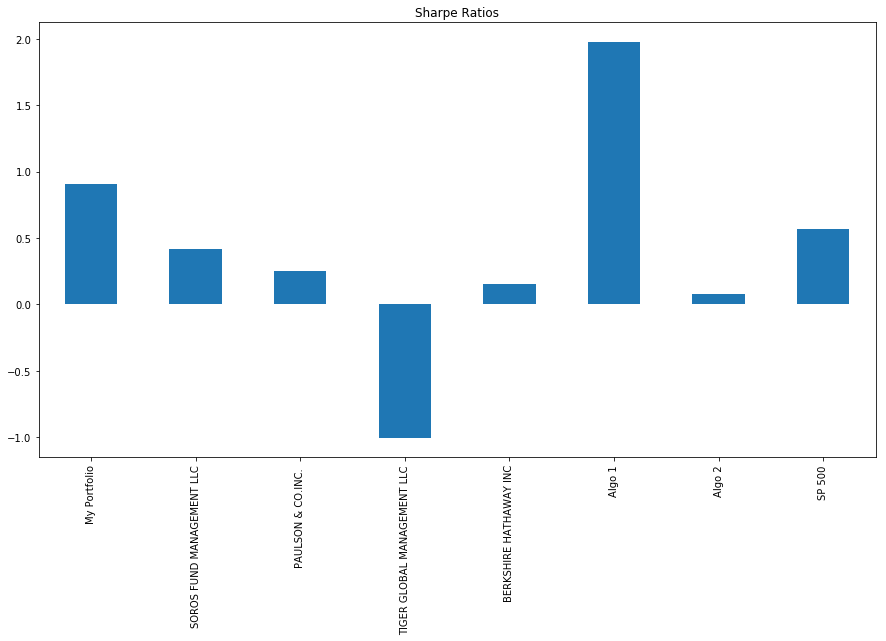

In [89]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = "Sharpe Ratios", figsize=(15, 8))

### How does your portfolio do?

Write your answer here!

On the basis of Sharpe Ratios, My Portfolio outperformed all other portfolios, except Algo 1. TIGER GLOBAL MANAGEMENT LLC, underperformed the market as a whole.